In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize_scalar
from matplotlib import pyplot as plt

In [2]:
A = pd.read_csv('A.csv', header=None)

In [3]:
A

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,72.0,85.0,9.0,2.0,4.4,6,0,0,0,1,5,0,0,0,0,7,1,3,3,4
1,640.0,69.0,25.0,52.0,17.0,8,4,6,2,3,6,7,7,0,6,4,7,6,3,8
2,42.0,5.6,3.4,2.5,5.0,5,9,5,5,6,7,2,6,8,7,5,5,4,6,0
3,371.0,34.0,3.6,0.4,20.0,3,3,8,7,8,2,6,4,7,5,0,4,5,8,9
4,250.0,8.0,1.0,3.2,6.5,0,8,3,8,4,3,5,5,3,0,3,3,2,4,0
5,545.0,100.0,5.0,33.0,56.5,7,6,9,1,5,0,9,9,4,4,9,8,8,5,6
6,360.7,35.6,7.7,19.1,39.5,0,7,7,0,9,8,4,8,9,9,8,2,0,9,5
7,57.0,5.9,3.0,3.2,4.0,4,5,2,6,2,9,3,3,6,3,0,9,9,2,0
8,334.0,4.0,12.0,2.0,67.0,9,2,4,9,7,4,8,2,5,8,6,6,7,7,7
9,365.0,16.0,12.0,1.3,59.0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
Psi = pd.read_csv('Psi.csv')

In [5]:
Psi

,Unnamed: 0,Стрижов,Гребенькова,Михеев,Тихонов,Панченко,Панкратов,Харь,Савельев,Исламов,Волынцев,Христолюбов,Алсаханова,Северилов,Колесов,Бишук
0,"Калорийность, кКал",6,9,3,8,7,10,10,3,1,10,10,7,8,10,10
1,"Цена 100г, руб.",7,9,6,3,8,10,10,8,10,10,4,8,10,10,10
2,Белки,0,8,9,5,7,9,7,9,9,10,10,6,10,8,10
3,Жиры,9,9,7,7,5,9,9,7,2,10,1,9,10,10,10
4,Углеводы,5,9,7,7,6,6,9,5,3,10,8,6,8,10,10
5,Стрижов,2,1,10,4,5,0,3,5,4,3,8,5,8,8,8
6,Гребенькова,0,9,3,5,5,5,10,10,10,5,5,4,10,8,8
7,Михеев,2,1,10,6,5,1,3,3,6,4,3,5,7,8,5
8,Тихонов,2,1,2,4,5,1,3,3,7,5,5,4,5,5,5
9,Панченко,2,1,8,5,6,1,3,3,8,7,4,5,10,5,5


In [6]:
A = np.array(A.values, dtype=float)

In [7]:
P = np.array(Psi.values[:, 1:], dtype = float)

In [8]:
w0 = P.T

In [9]:
q0 = A[:, 5:].T

In [11]:
n = q0.shape[1]
m = w0.shape[1]

In [12]:
def find_gamma(q0, w0):
    def f(g):
        w = np.linalg.inv(A.T@A+g*np.eye(A.shape[-1]))@(A.T@q0+g*w0)
        return (np.linalg.norm(A@w-q0)**2)/n + (np.linalg.norm(w-w0)**2)/m
    return minimize_scalar(f, bounds=(0, 100), method='Bounded').x

In [14]:
rangs = []
for k in range(q0.shape[0]):
    g = find_gamma(q0[k], w0[k])
    w = np.linalg.inv(A.T@A+g*np.eye(A.shape[-1]))@(A.T@q0[k]+g*w0[k])
    rangs.append((np.linalg.norm(A@w-q0[k])**2)/n + (np.linalg.norm(w-w0[k])**2)/m)

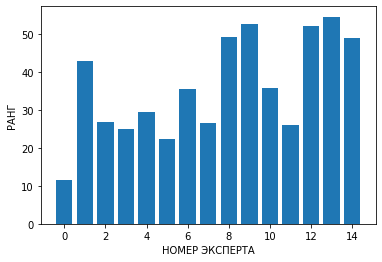

In [15]:
plt.bar(list(range(len(rangs))), rangs)
plt.xlabel('НОМЕР ЭКСПЕРТА')
plt.ylabel('РАНГ')
plt.show()

In [16]:
print('Номер лучшего эксперта =', rangs.index(max(rangs)))

Номер лучшего эксперта = 13


In [17]:
q0[13]

array([3., 3., 6., 8., 4., 5., 9., 2., 7., 0.])

In [18]:
rating = [8, 7, 4, 2, 6, 5, 1, 9, 3]

In [25]:
rating2 = [9, 4, 5, 6, 7, 1, 2, 8, 3]
rating8 = [7, 5, 3, 4, 8, 2, 1, 9, 6]
rating11 = [9, 4, 5, 6, 7, 2, 1, 8, 3]

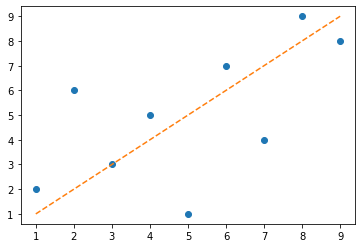

In [24]:
plt.plot(rating, rating2, 'o')
plt.plot(list(range(1, 10)), list(range(1, 10)), '--')
plt.show()

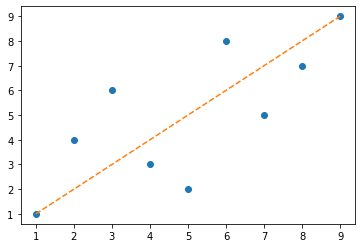

In [21]:
plt.plot(rating, rating8, 'o')
plt.plot(list(range(1, 10)), list(range(1, 10)), '--')
plt.show()

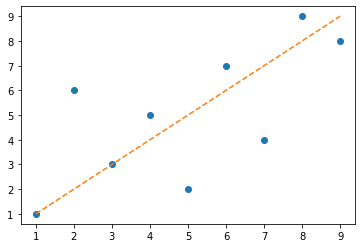

In [26]:
plt.plot(rating, rating11, 'o')
plt.plot(list(range(1, 10)), list(range(1, 10)), '--')
plt.show()